# Y E A S T

### 'fine replicates' and their consistency 

In [4]:
import pandas as pd
import numpy as np
import scipy.special as sc
import matplotlib.pyplot as plt

plt.rcParams["figure.dpi"] = 300

In [5]:
# basic bayexpress functions

from bayexpress_functions import get_BF_21, get_FC, get_q, get_BF_k1

# setting the priors to flat prios
u_1 = 1
u_2 = 1


### CONSISTENCY TESTS

In [6]:
WT_yeast = pd.read_csv('WT_yeast.csv', index_col=0)
Snf2_yeast = pd.read_csv('Snf2_yeast.csv', index_col=0)

display(WT_yeast)
display(Snf2_yeast)

,genes,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,15S_rRNA,2,12,31,8,21,11,2,3,7,...,0,49,9,4,11,12,1,22,12,4
1,21S_rRNA,20,76,101,99,128,74,36,32,57,...,10,274,49,30,72,58,21,159,107,70
2,HRA1,3,2,2,2,3,5,4,0,4,...,5,3,6,5,2,2,2,5,2,1
3,ICR1,75,123,107,157,98,245,119,120,119,...,85,177,137,118,113,81,142,94,187,106
4,LSR1,60,163,233,163,193,375,194,84,211,...,66,385,232,149,114,81,109,132,243,128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7121,tY(GUA)J2,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7122,tY(GUA)M1,0,0,1,1,1,1,0,0,1,...,0,1,1,0,1,0,0,0,1,0
7123,tY(GUA)M2,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7124,tY(GUA)O,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1


,genes,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
0,15S_rRNA,4,2,5,5,46,5,4,2,40,...,7,15,6,1,85,8,34,3,6,3
1,21S_rRNA,31,18,23,44,356,35,33,13,148,...,64,79,67,13,576,52,234,23,44,24
2,HRA1,5,1,3,1,2,1,4,4,0,...,5,5,0,2,0,1,2,2,0,1
3,ICR1,205,196,211,252,127,275,160,190,146,...,286,155,184,164,202,186,148,183,195,145
4,LSR1,210,103,159,260,298,303,96,132,263,...,250,195,153,57,742,227,227,117,224,136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7121,tY(GUA)J2,1,0,0,0,0,0,1,0,0,...,1,1,0,0,0,0,0,2,1,1
7122,tY(GUA)M1,0,0,1,0,2,0,0,0,0,...,1,1,1,0,0,0,0,0,0,1
7123,tY(GUA)M2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7124,tY(GUA)O,0,1,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0


In [7]:
# exploring 'cumulative' BF_k1

def get_cumu_BF_k1(data):
    out_data = pd.DataFrame({})
    for k in range(3,len(data.columns)+1):

        evidence2 = np.full(len(data), 0)

        # iterating over j until k
        for col in data.columns[1:k]: 
            n_j = data[col]
            # print(n_j, 'n_j')
            N_j = sum(data[col])
            # print(N_j, 'N_j')
            evidence2 = evidence2 + sc.betaln(u_1 + n_j, u_2 + N_j - n_j)

        N = sum(data.iloc[:,1:k].sum(axis=0, numeric_only=True))
        n_i = data.iloc[:,1:k].sum(axis=1, numeric_only=True)

        # print(n_i, 'n_i')
        # print(N, 'N')

        evidence1 = sc.betaln( u_1 + n_i, u_2 + N - n_i)
        
        out_data[f'{k-1}'] = (evidence2 - evidence1) / np.log(10) 

    return out_data

In [8]:
# calculating 'cumulatative' BF_k1

WT_cumu = get_cumu_BF_k1(WT_yeast)

display(WT_cumu)

Snf2_cumu = get_cumu_BF_k1(Snf2_yeast)


display(Snf2_cumu)

,2,3,4,5,6,7,8,9,10,11,...,33,34,35,36,37,38,39,40,41,42
0,-4.824123,-4.912829,-8.839685,-14.117564,-17.996641,-21.086076,-24.943705,-30.693142,-36.473404,-36.748828,...,-78.392957,-79.236264,-83.873072,-87.899103,-93.755645,-99.564530,-98.737339,-102.165373,-107.111094,-111.028167
1,-0.963656,0.632576,-4.889390,-5.707717,-1.756501,-1.034256,1.474677,-3.694451,-4.328017,30.503034,...,314.603331,332.522436,337.316054,341.359343,335.890120,333.215257,356.876602,375.089399,370.679089,365.965229
2,-5.943931,-12.083265,-18.278537,-24.465218,-30.802653,-36.940374,-42.530537,-48.629171,-54.649860,-60.521649,...,-192.140921,-198.484739,-204.355581,-210.085429,-216.320230,-222.587706,-228.790003,-234.076721,-240.250222,-246.380070
3,-4.823112,-9.807353,-15.238338,-19.905392,-24.625241,-29.785183,-34.360645,-39.709611,-44.590227,-49.889550,...,-155.375929,-160.782614,-166.296698,-171.236715,-175.771447,-179.030847,-184.072077,-188.751188,-193.899154,-199.310861
4,0.108211,10.803119,9.032746,4.700363,1.487643,-3.873543,11.533645,7.137768,1.803757,6.654632,...,249.996802,253.183338,247.773924,242.971550,239.948338,250.582110,269.366427,264.188637,259.247720,257.043307
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7121,-6.286567,-12.763830,-19.421876,-26.124338,-32.363821,-39.044382,-45.782284,-52.528131,-59.264657,-65.422555,...,-215.130801,-222.115884,-229.041179,-235.853189,-242.628019,-249.481368,-256.468048,-263.178684,-270.184691,-277.038617
7122,-6.531056,-12.675472,-19.165382,-25.559965,-32.208462,-38.822300,-45.496440,-51.930123,-58.585525,-65.225674,...,-209.970841,-216.538875,-223.000753,-229.707786,-235.891374,-242.622613,-249.440170,-256.071351,-262.651404,-269.387754
7123,-6.531056,-12.675472,-19.333519,-26.035980,-32.922786,-39.191373,-45.993039,-52.789226,-59.566314,-66.302507,...,-215.904536,-222.907910,-229.847933,-236.670440,-243.454560,-250.319009,-257.321064,-264.038923,-271.060168,-277.923892
7124,-6.531056,-13.174062,-20.012232,-26.815334,-33.841214,-39.875493,-46.740922,-53.587450,-60.405100,-67.173308,...,-217.027288,-224.048953,-230.003826,-236.826334,-243.610453,-250.474902,-257.476958,-264.194816,-271.216061,-277.030310


,2,3,4,5,6,7,8,9,10,11,...,35,36,37,38,39,40,41,42,43,44
0,-6.103991,-12.057457,-18.248233,-0.689254,-4.779452,-10.148008,-14.380417,-8.405656,-13.822875,-19.135557,...,58.990171,53.171198,50.286105,48.540940,67.204146,63.100998,59.969102,58.492922,55.074698,52.273279
1,-5.373082,-11.152096,-15.709169,164.012305,176.098447,175.473667,187.389002,199.129378,194.351127,194.767768,...,804.627349,799.728536,799.019121,811.207678,1011.496083,1014.180313,1037.861715,1054.538366,1059.645076,1068.603540
2,-5.776665,-11.988302,-18.045738,-24.279166,-30.448821,-36.302987,-42.457222,-48.388459,-54.694911,-60.979764,...,-209.316343,-214.850561,-220.739455,-226.997613,-232.939793,-239.278730,-245.600999,-251.971431,-257.999634,-264.347894
3,-4.971297,-9.804811,-14.992280,-19.330740,-24.753763,-29.744215,-34.505353,-38.882697,-44.050455,-49.311961,...,-155.746721,-161.075340,-166.370178,-170.515722,-175.754308,-181.035691,-186.357233,-191.677668,-196.533408,-201.913097
4,-0.576562,-5.754128,-6.633886,15.230201,10.031782,15.283111,17.306187,20.515392,18.416235,13.685228,...,321.437539,316.081994,316.897201,329.751911,485.680806,480.472207,476.587686,482.279438,477.098099,473.797677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7121,-6.404911,-13.017210,-19.762178,-26.456642,-33.341253,-39.530966,-46.347490,-53.129063,-59.979981,-66.750607,...,-230.114841,-236.079392,-242.999319,-249.784977,-256.694193,-263.577612,-270.417138,-275.356707,-281.477286,-287.490152
7122,-6.672068,-12.950527,-19.695495,-25.231652,-31.904670,-38.586324,-45.341319,-52.078137,-58.880708,-65.618429,...,-222.528536,-228.875641,-235.353807,-242.033736,-248.799687,-255.553666,-262.281139,-269.041926,-275.805506,-282.046301
7123,-6.672068,-13.449795,-20.336202,-27.102349,-34.092758,-40.946441,-47.886024,-54.757106,-61.704721,-67.404270,...,-229.953348,-236.815191,-243.748169,-250.542638,-257.463792,-264.357998,-271.206862,-278.100616,-284.993383,-291.816655
7124,-6.334297,-12.946597,-19.691564,-26.386028,-33.270640,-40.066980,-46.945034,-53.063258,-59.914177,-66.684802,...,-228.743133,-234.775721,-241.682596,-248.459444,-255.356721,-262.229353,-269.059542,-275.932839,-282.805731,-289.612759


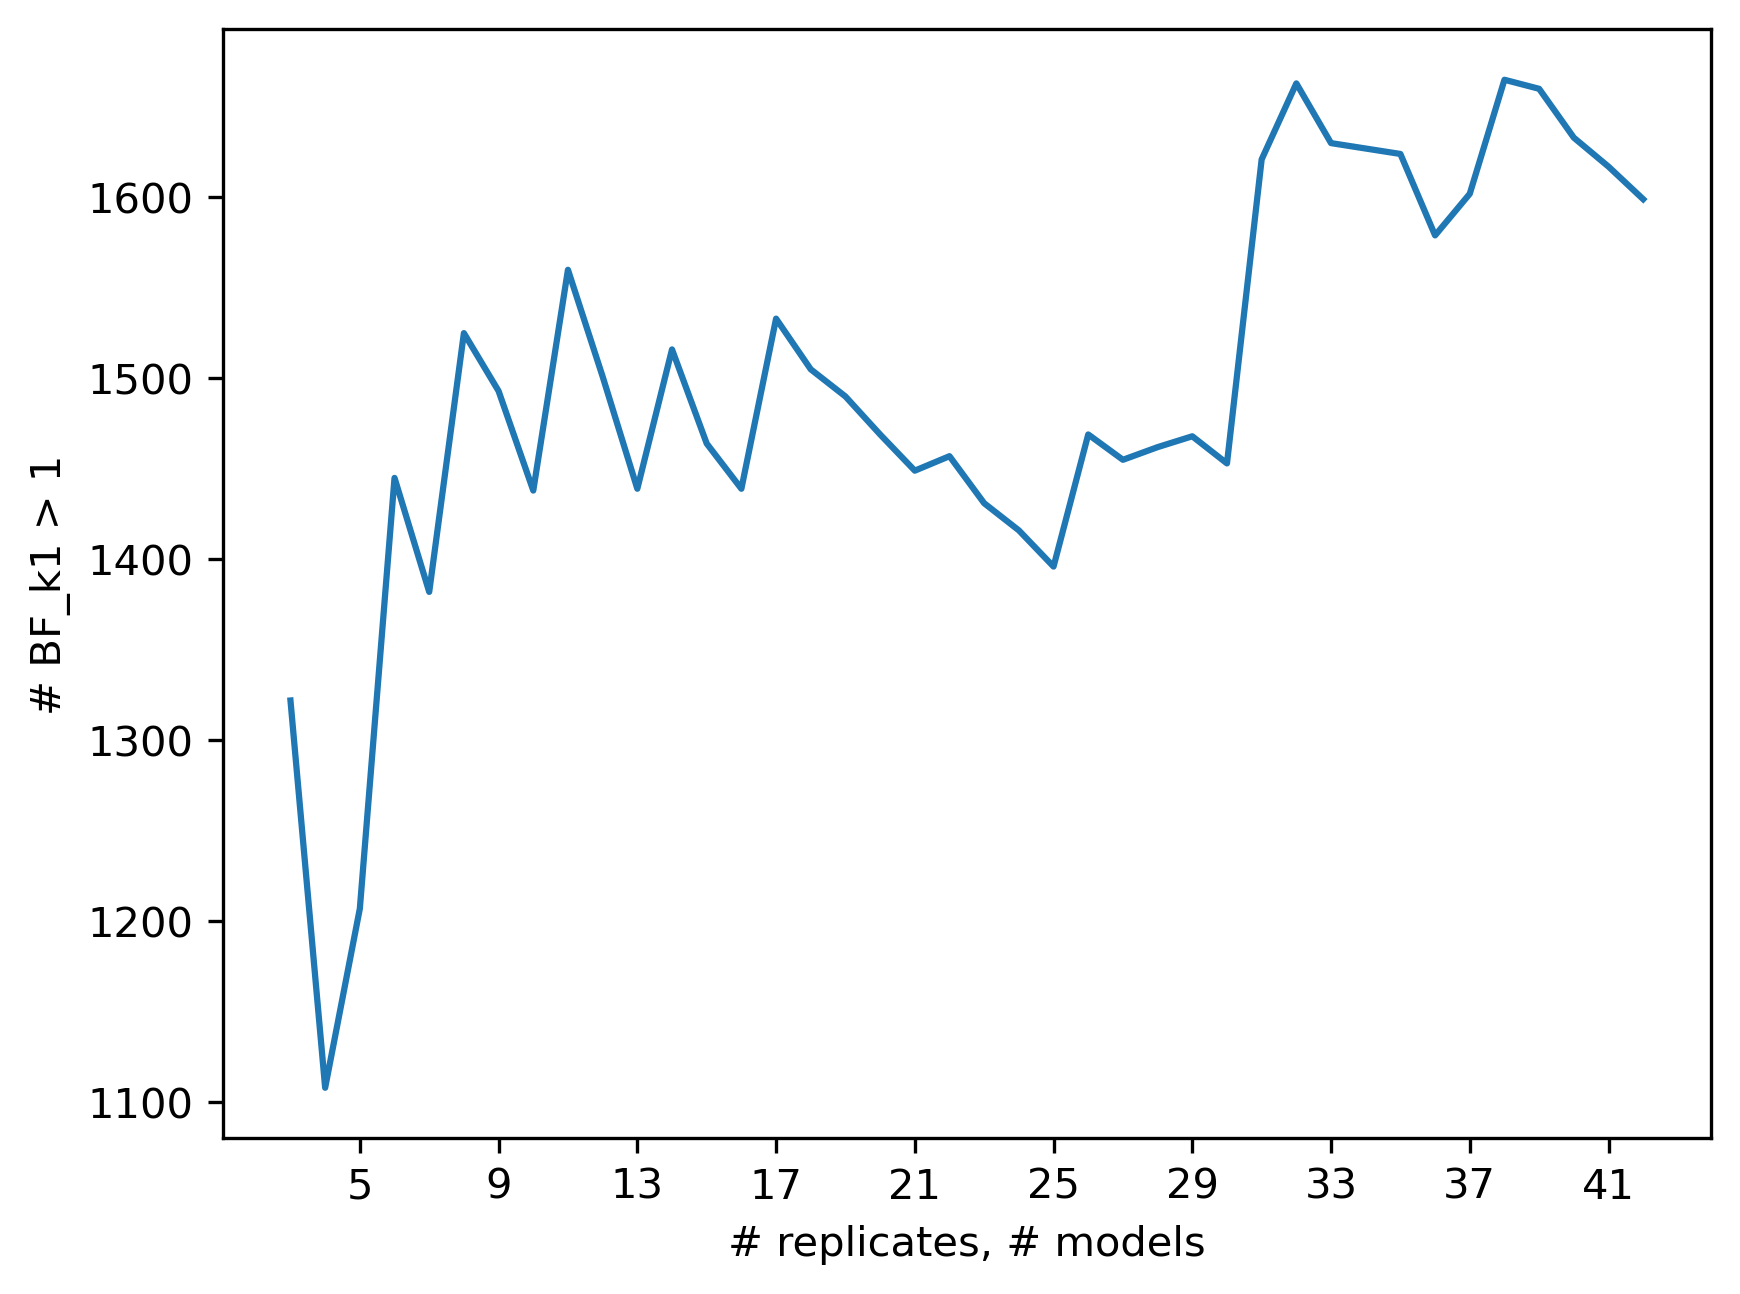

In [9]:
# this is the general idea

# finding the number of genes with BF_k1 > 1 while increasing number of reps
series = (WT_cumu.iloc[:,1:] > 1).sum()

series.plot(xlabel='# replicates, # models', ylabel='# BF_k1 > 1', xticks=range(2,len(series),4), legend=False)


plt.show()

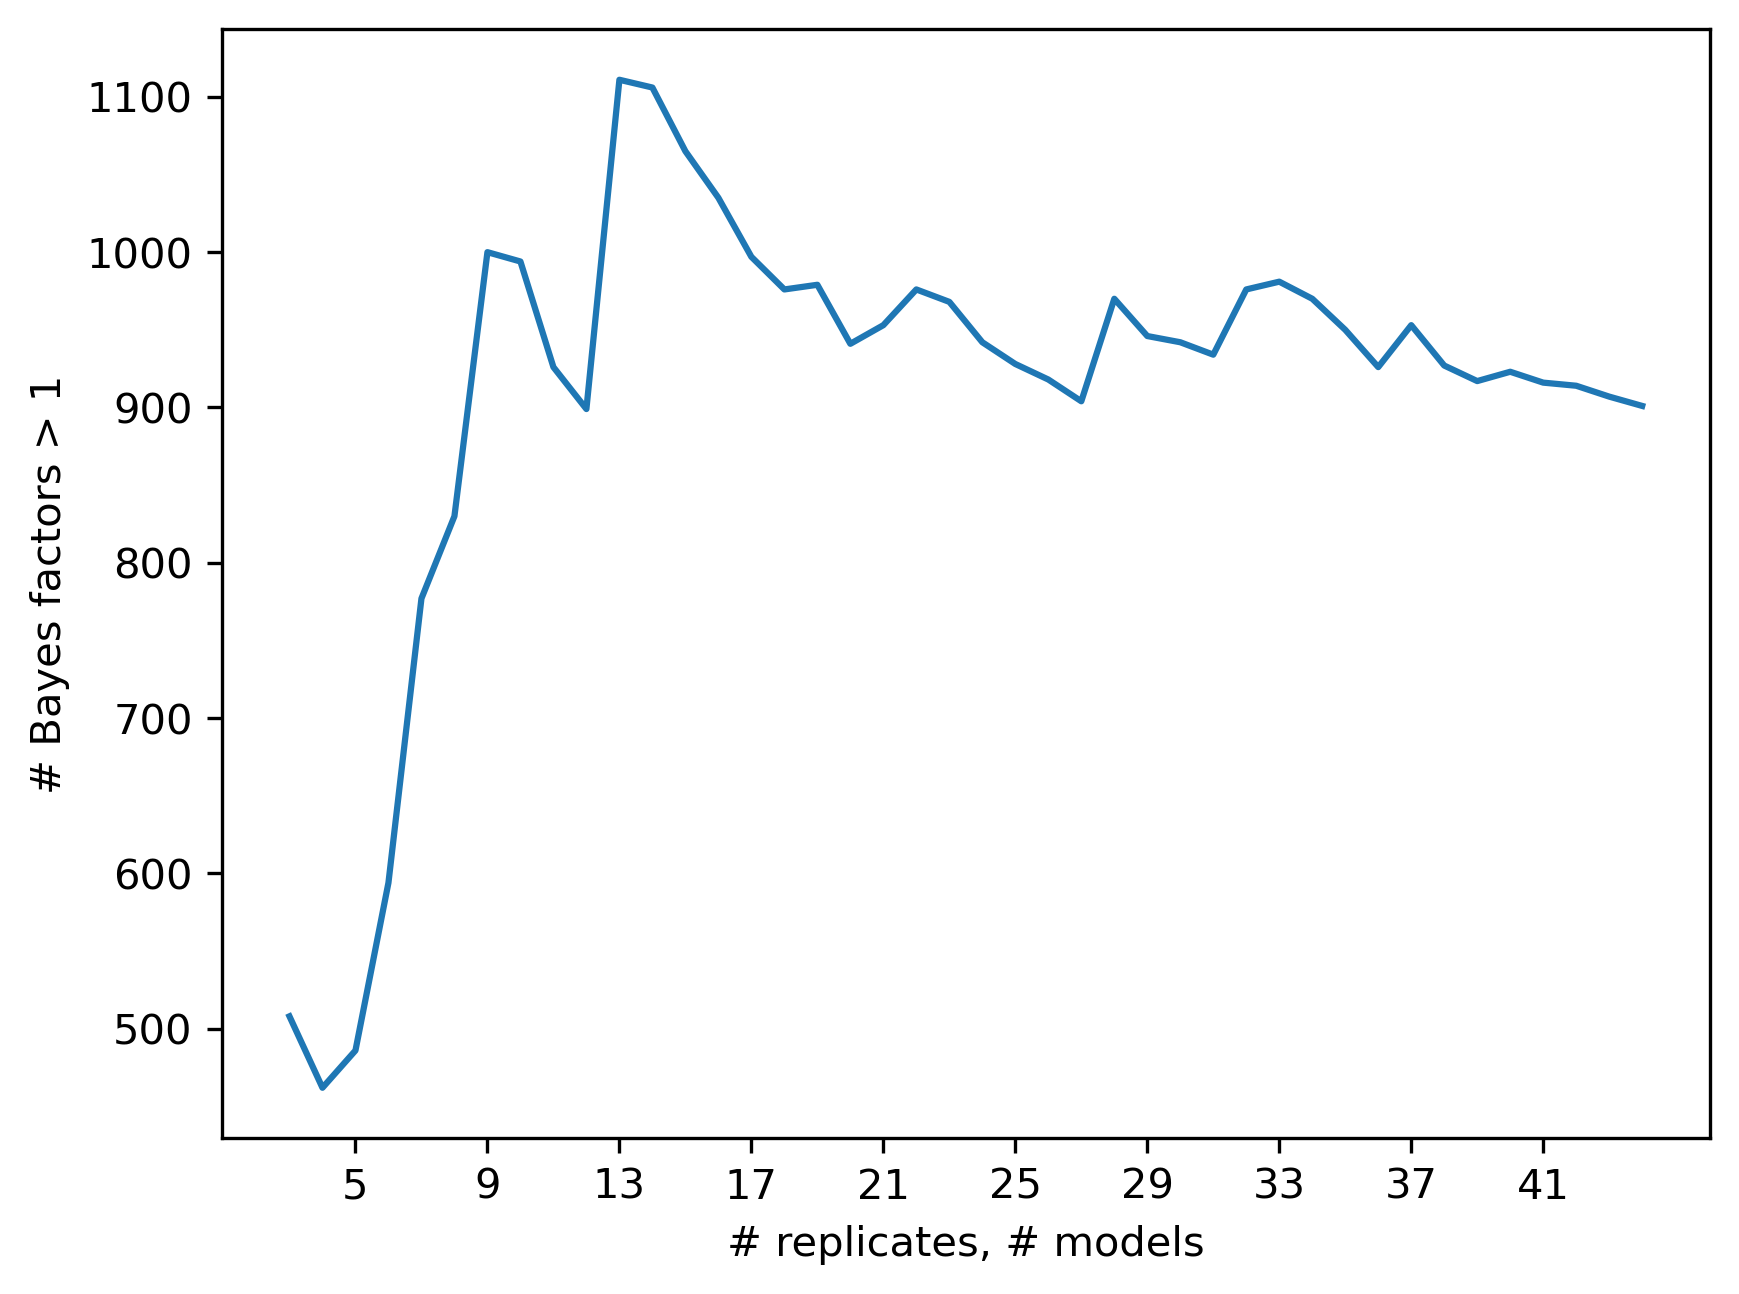

In [10]:
# this is the general idea

# finding the number of genes with BF_k1 > 1 while increasing number of reps
series = (Snf2_cumu.iloc[:,1:] > 1).sum()


series.plot(xlabel='# replicates, # models', ylabel='# Bayes factors > 1', xticks=range(2,len(series),4), legend=False)

plt.show()

In [11]:
# then bootstrapping this idea
# 20 times for figure

WT_cons_it_20 = pd.DataFrame({})
# let's do this with more iterations
# Which genes are consistently inconsistent (CIG) in the wild-type?
# WT_CIG = []

for i in range(20):

    col_order = np.array(WT_yeast.columns[1:])
    np.random.shuffle(col_order)
    # print(col_order)

    cumu_BF_k1 = get_cumu_BF_k1(WT_yeast[col_order])
    # Which genes are consistently inconsistent (CIG) in the wild-type?
    # WT_CIG.append(WT_yeast.loc[(cumu_BF_k1).iloc[:,-1] > 1].index)

    WT_cons_it_20[f'{i+1}'] = ((cumu_BF_k1) > 1).sum()

# Display the DataFrame
display(WT_cons_it_20)


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
2,1399,1061,881,2013,928,2243,627,1423,660,494,1659,1614,1772,1715,924,1431,1682,915,670,1979
3,1673,1003,1594,2690,741,1840,982,1673,2443,1811,1219,1668,1476,1379,1312,1169,1533,1606,509,1936
4,1457,913,1444,2329,800,1530,1061,1535,2132,1791,1137,1807,1578,1732,1237,1127,1417,1365,1288,1746
5,1351,1137,1214,2112,822,1285,1337,1690,1973,1631,1038,1753,1510,1438,1350,1492,2494,1320,1148,1646
6,1491,1238,1444,1935,767,1592,1216,1581,2129,1514,1138,1670,1471,1620,1321,1481,2418,1174,1093,1570
7,1361,1095,1497,1776,724,2448,1148,1623,1973,1563,1183,1613,1491,1476,1795,1591,2558,1389,1090,1550
8,1294,1204,1446,1681,769,2326,1416,1559,2123,1484,1093,1493,1442,1938,1768,1490,2373,1330,1136,1574
9,1227,1099,1500,1701,1133,2453,1759,1545,2143,1424,1207,1474,1618,1824,1690,1535,2297,1259,1171,1618
10,1568,1188,1420,1726,1473,2350,1706,1574,2155,1570,1150,1749,1644,1706,1587,1582,2147,1199,1231,1776
11,1548,1327,1472,1780,1441,2266,1654,1608,2015,1530,1113,1676,1822,1725,1606,1541,2023,1201,1185,1703


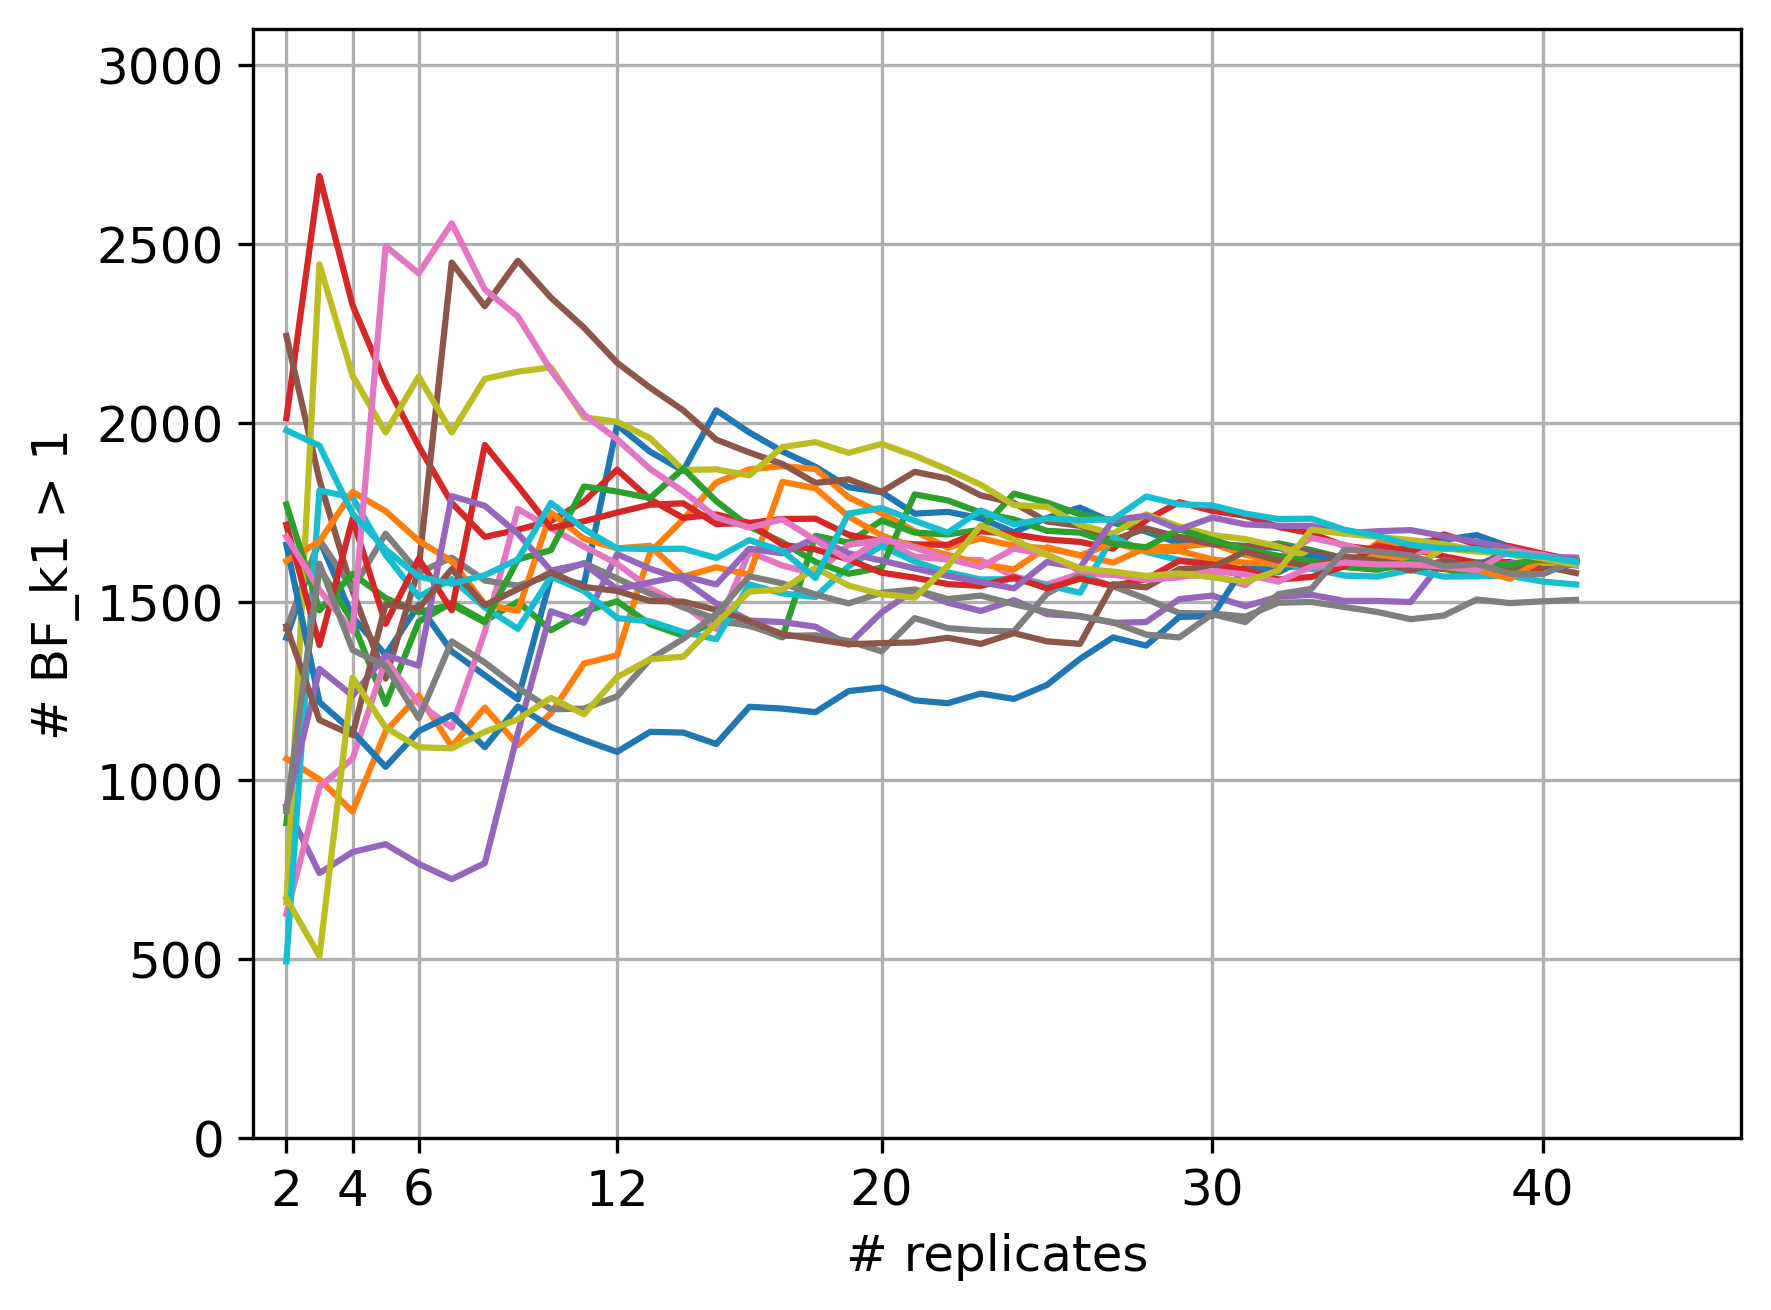

In [12]:
# Create the plot
ax = WT_cons_it_20.plot(legend=False, grid=True,
                      xlabel='# replicates',
                      ylabel='# BF_k1 > 1', fontsize=12)

# Set axis limits
ax.set_xlim(-1, 44)  # Set x-axis limits (adjust as needed)
ax.set_ylim(0, 3100)  # Set y-axis limits based on your data

# Set axis labels with increased font size
ax.set_xlabel('# replicates', fontsize=12)  # Adjust fontsize as needed
ax.set_ylabel('# BF_k1 > 1', fontsize=12)  # Adjust fontsize as needed

# Customize x-ticks and increase font size
ax.set_xticks([0, 2, 4, 10, 18, 28, 38])
ax.set_xticklabels(['2', '4', '6', '12', '20', '30', '40'], fontsize=12)  # Adjust fontsize as needed



# Show the plot
plt.show()

In [13]:
# then bootstrapping this idea
# 100 times for identifying genes

WT_cons_it = pd.DataFrame({})
# Which genes are consistently inconsistent (CIG) in the wild-type?
WT_CIG = []

for i in range(100):

    col_order = np.array(WT_yeast.columns[1:])
    np.random.shuffle(col_order)
    # print(col_order)

    cumu_BF_k1 = get_cumu_BF_k1(WT_yeast[col_order])
    # Which genes are consistently inconsistent (CIG) in the wild-type?
    WT_CIG.append(WT_yeast.loc[(cumu_BF_k1).iloc[:,-1] > 1].index)

    WT_cons_it[f'{i+1}'] = ((cumu_BF_k1) > 1).sum()

# Display the DataFrame
display(WT_cons_it)


,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
2,434,1276,325,1696,539,881,112,1218,1675,788,...,712,1544,539,2031,327,466,1536,645,191,583
3,942,1233,1148,1264,887,932,691,2493,1445,579,...,961,1768,1129,1645,581,655,1444,993,805,1786
4,1168,1248,1055,1226,1539,1542,1247,2182,1589,1413,...,1295,1445,1280,1712,1259,991,1176,1170,680,1857
5,1781,1326,1223,1160,1862,1930,1447,2092,1389,1801,...,1664,1494,1626,1600,1350,1163,1134,1412,1107,1585
6,1664,1298,1218,1300,1691,1834,1645,1853,1280,1620,...,1531,1497,1534,1510,1590,1201,1557,1388,1687,1956
7,1834,1351,1187,1253,1532,1652,1510,1770,1398,1731,...,1722,1391,1513,1440,1603,1170,1693,1504,1770,1771
8,1710,1363,1117,1232,1456,1709,1527,1764,1309,1621,...,1652,1378,1485,1354,1598,1127,1627,1616,1952,1982
9,1606,1329,1112,1185,1420,1776,1473,1624,1474,1548,...,1517,1463,1487,1298,1486,1126,1536,1792,1864,1918
10,1566,1567,1253,1185,1452,1746,1447,1631,1471,1493,...,1517,1611,1415,1252,1508,1306,1486,1780,1858,1897
11,1501,1514,1302,1258,1369,1662,1362,1559,1408,1436,...,1444,1565,1483,1251,1418,1452,1469,1672,1828,1837


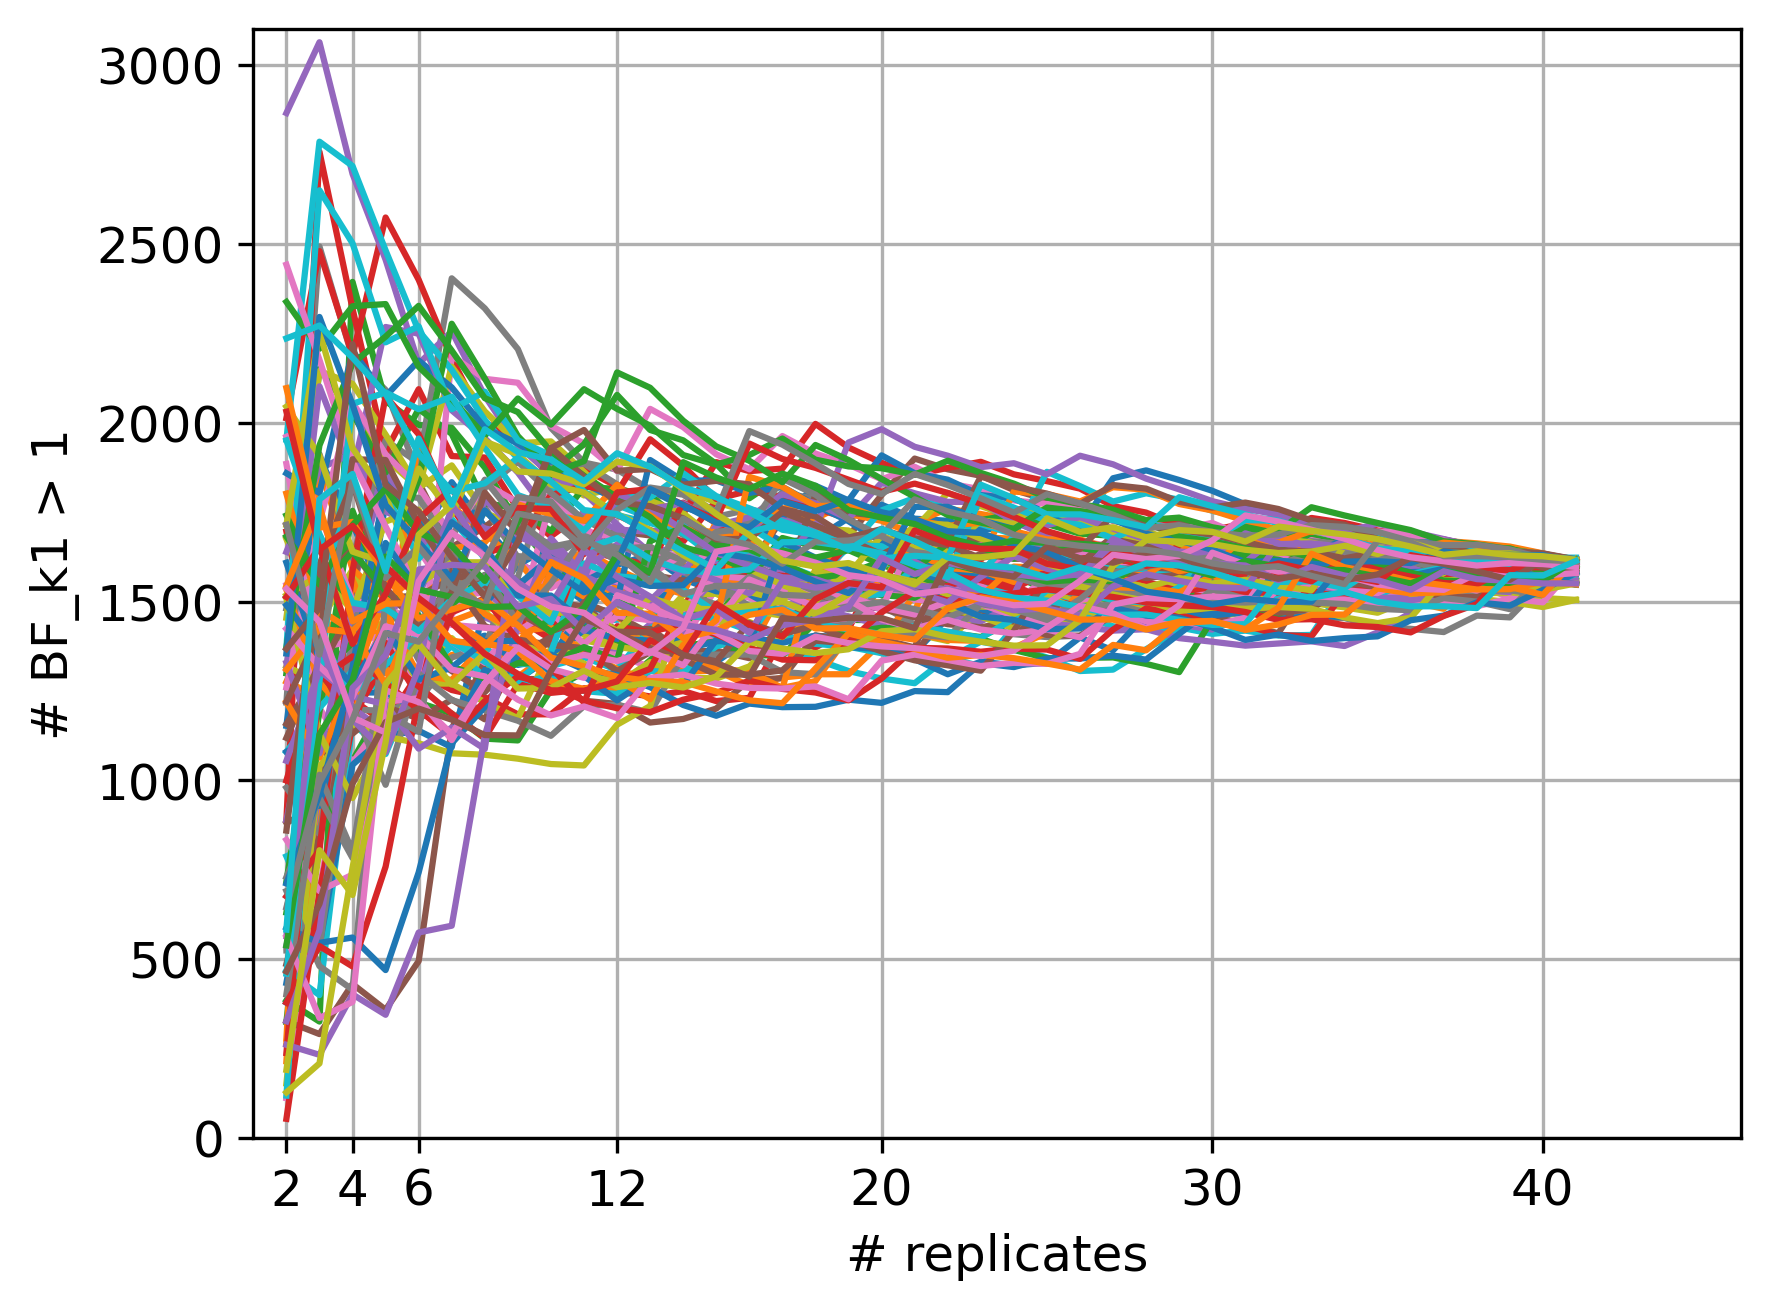

In [14]:

# Create the plot
ax = WT_cons_it.plot(legend=False, grid=True,
                      xlabel='# replicates',
                      ylabel='# BF_k1 > 1',fontsize=12)

# Set axis limits
ax.set_xlim(-1, 44)  # Set x-axis limits (adjust as needed)
ax.set_ylim(0, 3100)  # Set y-axis limits based on your data

# Set axis labels with increased font size
ax.set_xlabel('# replicates', fontsize=12)  # Adjust fontsize as needed
ax.set_ylabel('# BF_k1 > 1', fontsize=12)  # Adjust fontsize as needed

# Customize x-ticks and increase font size
ax.set_xticks([0, 2, 4, 10, 18, 28, 38])
ax.set_xticklabels(['2', '4', '6', '12', '20', '30', '40'], fontsize=12)  # Adjust fontsize as needed



# Show the plot
plt.show()

In [15]:
# again, bootstrapping this idea but on the mutant

Snf2_cons_it_20 = pd.DataFrame({})
# Which genes are consistently inconsistent (CIG) in the mutant?
# Snf2_CIG = []

for i in range(20):

    col_order = np.array(Snf2_yeast.columns[1:])
    np.random.shuffle(col_order)
    # print(col_order)

    cumu_BF_k1 = get_cumu_BF_k1(Snf2_yeast[col_order])
    # Snf2_CIG.append(Snf2_yeast.loc[(cumu_BF_k1).iloc[:,-1] > 1].index)

    Snf2_cons_it_20[f'{i+1}'] = ((cumu_BF_k1) > 1).sum()

# Display the DataFrame
display(Snf2_cons_it_20)


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
2,1038,487,1432,489,1211,997,242,343,2315,534,635,337,629,1735,429,748,1836,1085,2085,955
3,1336,420,1151,1115,920,1263,357,616,1809,721,555,508,605,1284,602,1050,1261,712,1444,1114
4,1036,485,1172,953,966,1446,481,1208,1599,760,539,591,539,1177,1017,880,951,800,1203,1039
5,978,861,1154,970,887,1325,519,996,1355,768,550,498,594,1094,850,740,1046,688,1023,919
6,881,775,920,828,811,1377,1025,1038,1271,783,483,655,572,977,827,975,888,702,866,807
7,794,819,914,776,1030,1375,1136,991,1126,726,451,594,574,1333,778,835,793,737,831,788
8,948,763,922,934,1007,1344,1038,876,1075,700,448,878,534,1271,753,889,1127,766,804,811
9,882,728,952,869,952,1446,1126,948,1004,682,484,813,614,1152,753,900,1082,855,773,826
10,904,718,900,862,917,1417,1140,927,986,670,900,907,713,1052,698,829,1171,1005,731,783
11,974,698,909,821,853,1383,1096,892,931,681,867,837,871,1034,698,852,1190,995,754,745


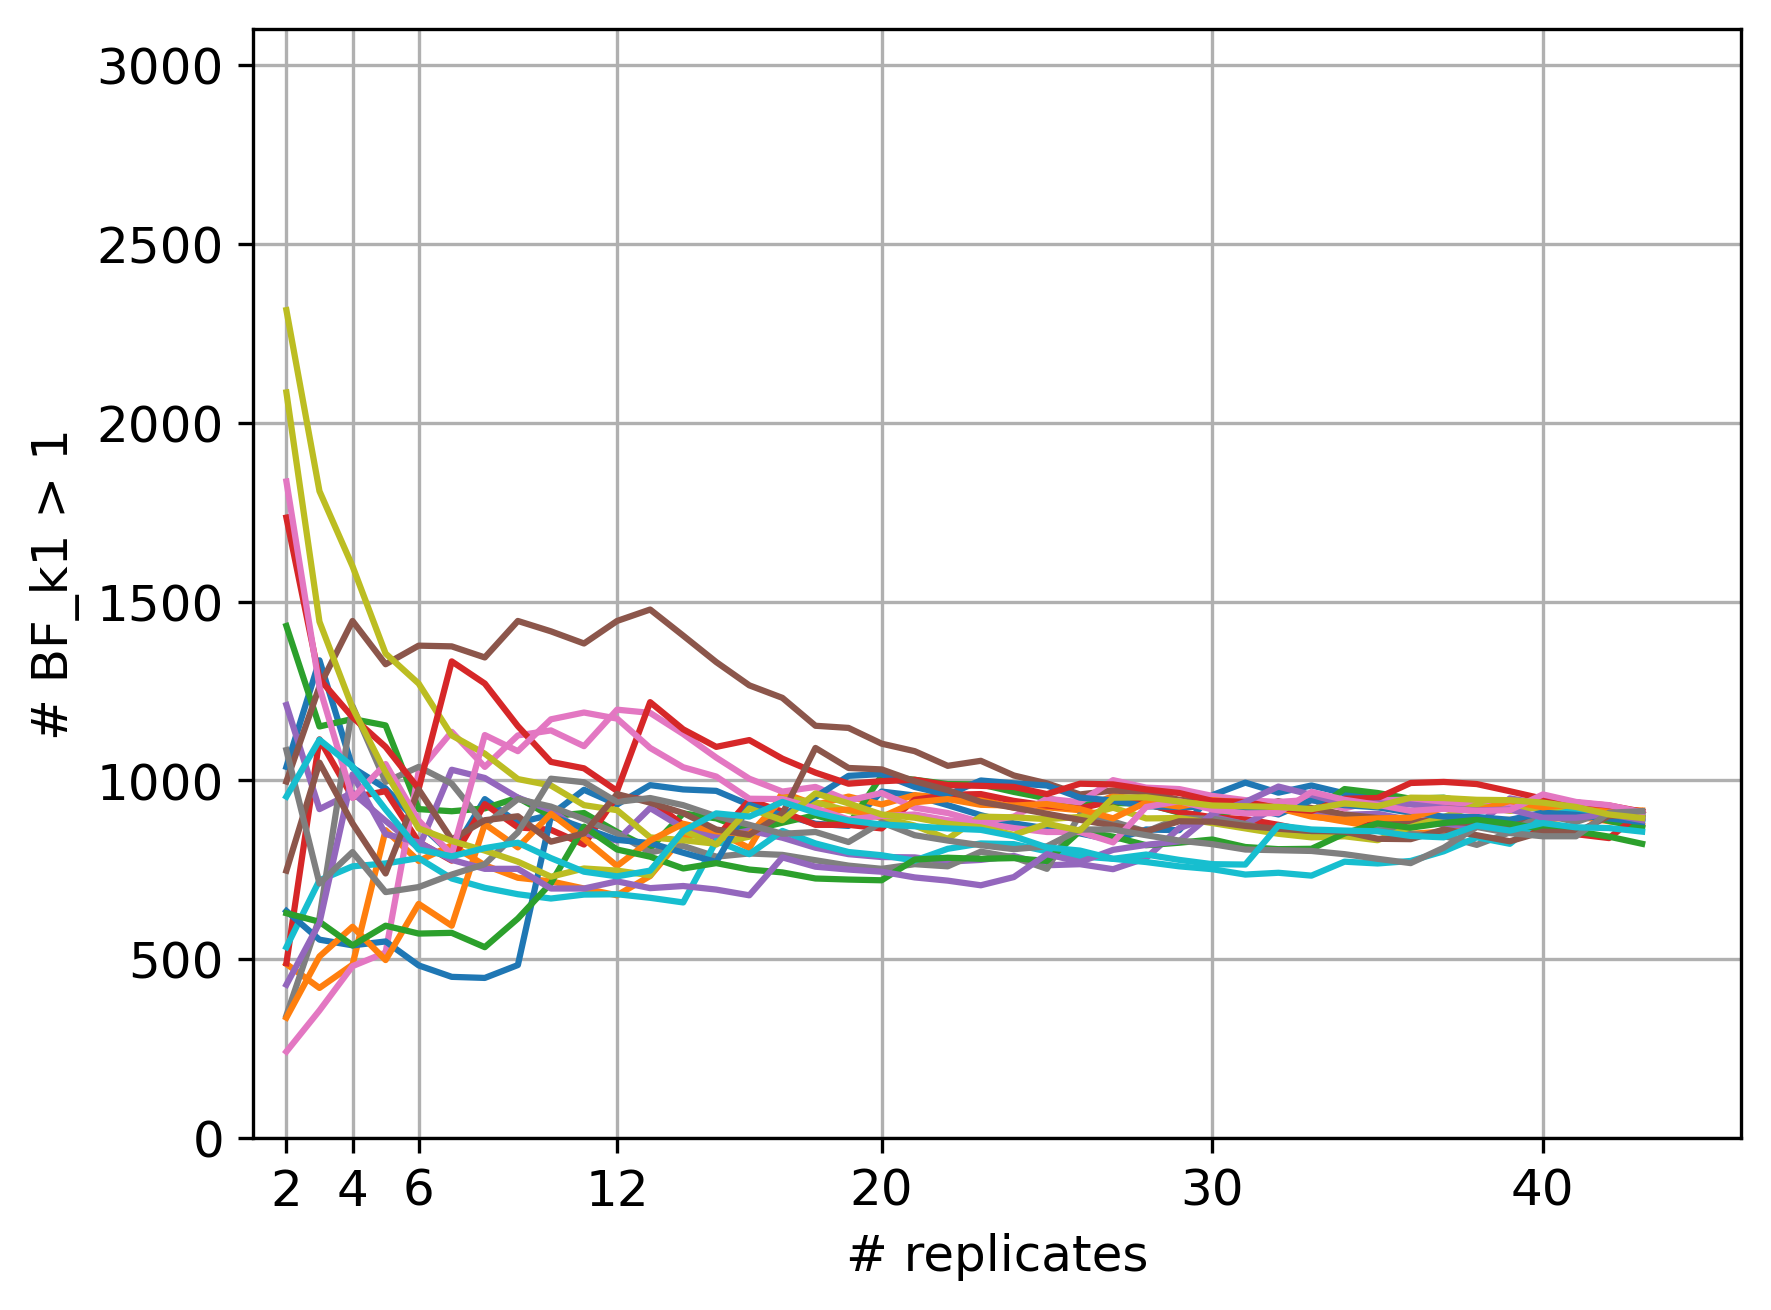

In [16]:

# Create the plot
ax = Snf2_cons_it_20.plot(legend=False, grid=True, fontsize=12)

# Set axis limits
ax.set_xlim(-1, 44)  # Set x-axis limits (adjust as needed)
ax.set_ylim(0, 3100)  # Set y-axis limits based on your data

# Set axis labels with increased font size
ax.set_xlabel('# replicates', fontsize=12)  # Adjust fontsize as needed
ax.set_ylabel('# BF_k1 > 1', fontsize=12)  # Adjust fontsize as needed

# Customize x-ticks and increase font size
ax.set_xticks([0, 2, 4, 10, 18, 28, 38])
ax.set_xticklabels(['2', '4', '6', '12', '20', '30', '40'], fontsize=12)  # Adjust fontsize as needed



# Show the plot
plt.show()

In [17]:
# again, bootstrapping this idea but on the mutant

Snf2_cons_it = pd.DataFrame({})
Snf2_CIG = []

for i in range(100):

    col_order = np.array(Snf2_yeast.columns[1:])
    np.random.shuffle(col_order)
    # print(col_order)

    cumu_BF_k1 = get_cumu_BF_k1(Snf2_yeast[col_order])
    Snf2_CIG.append(Snf2_yeast.loc[(cumu_BF_k1).iloc[:,-1] > 1].index)

    Snf2_cons_it[f'{i+1}'] = ((cumu_BF_k1) > 1).sum()

# Display the DataFrame
display(Snf2_cons_it)

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
2,905,670,581,410,1575,1458,936,516,1031,478,...,1085,168,876,1791,690,1476,1176,412,265,349
3,1073,1031,857,580,1679,967,1556,594,1275,963,...,1250,328,905,1625,608,1076,831,374,341,534
4,963,712,1000,644,1701,1506,1228,917,987,1143,...,979,554,699,1276,1068,1222,876,500,474,536
5,983,1157,942,580,1659,1298,1411,828,856,1033,...,1025,583,753,1122,989,1109,778,566,492,547
6,897,977,870,685,1574,1162,1217,791,800,972,...,975,702,696,1290,1003,946,712,574,1144,1177
7,813,849,859,640,1528,1010,1143,693,765,1076,...,987,675,678,1174,879,939,976,978,1055,1102
8,717,802,975,707,1359,882,1166,663,1295,991,...,1350,658,693,1052,846,855,950,1072,1061,1014
9,702,756,1126,696,1232,872,1065,647,1230,902,...,1434,857,793,1126,767,857,886,985,1198,1163
10,823,888,1080,644,1166,948,1020,810,1171,942,...,1416,820,986,1141,717,832,880,956,1141,1057
11,918,883,1040,739,1093,925,991,792,1129,925,...,1376,804,948,1050,676,778,865,890,1124,965


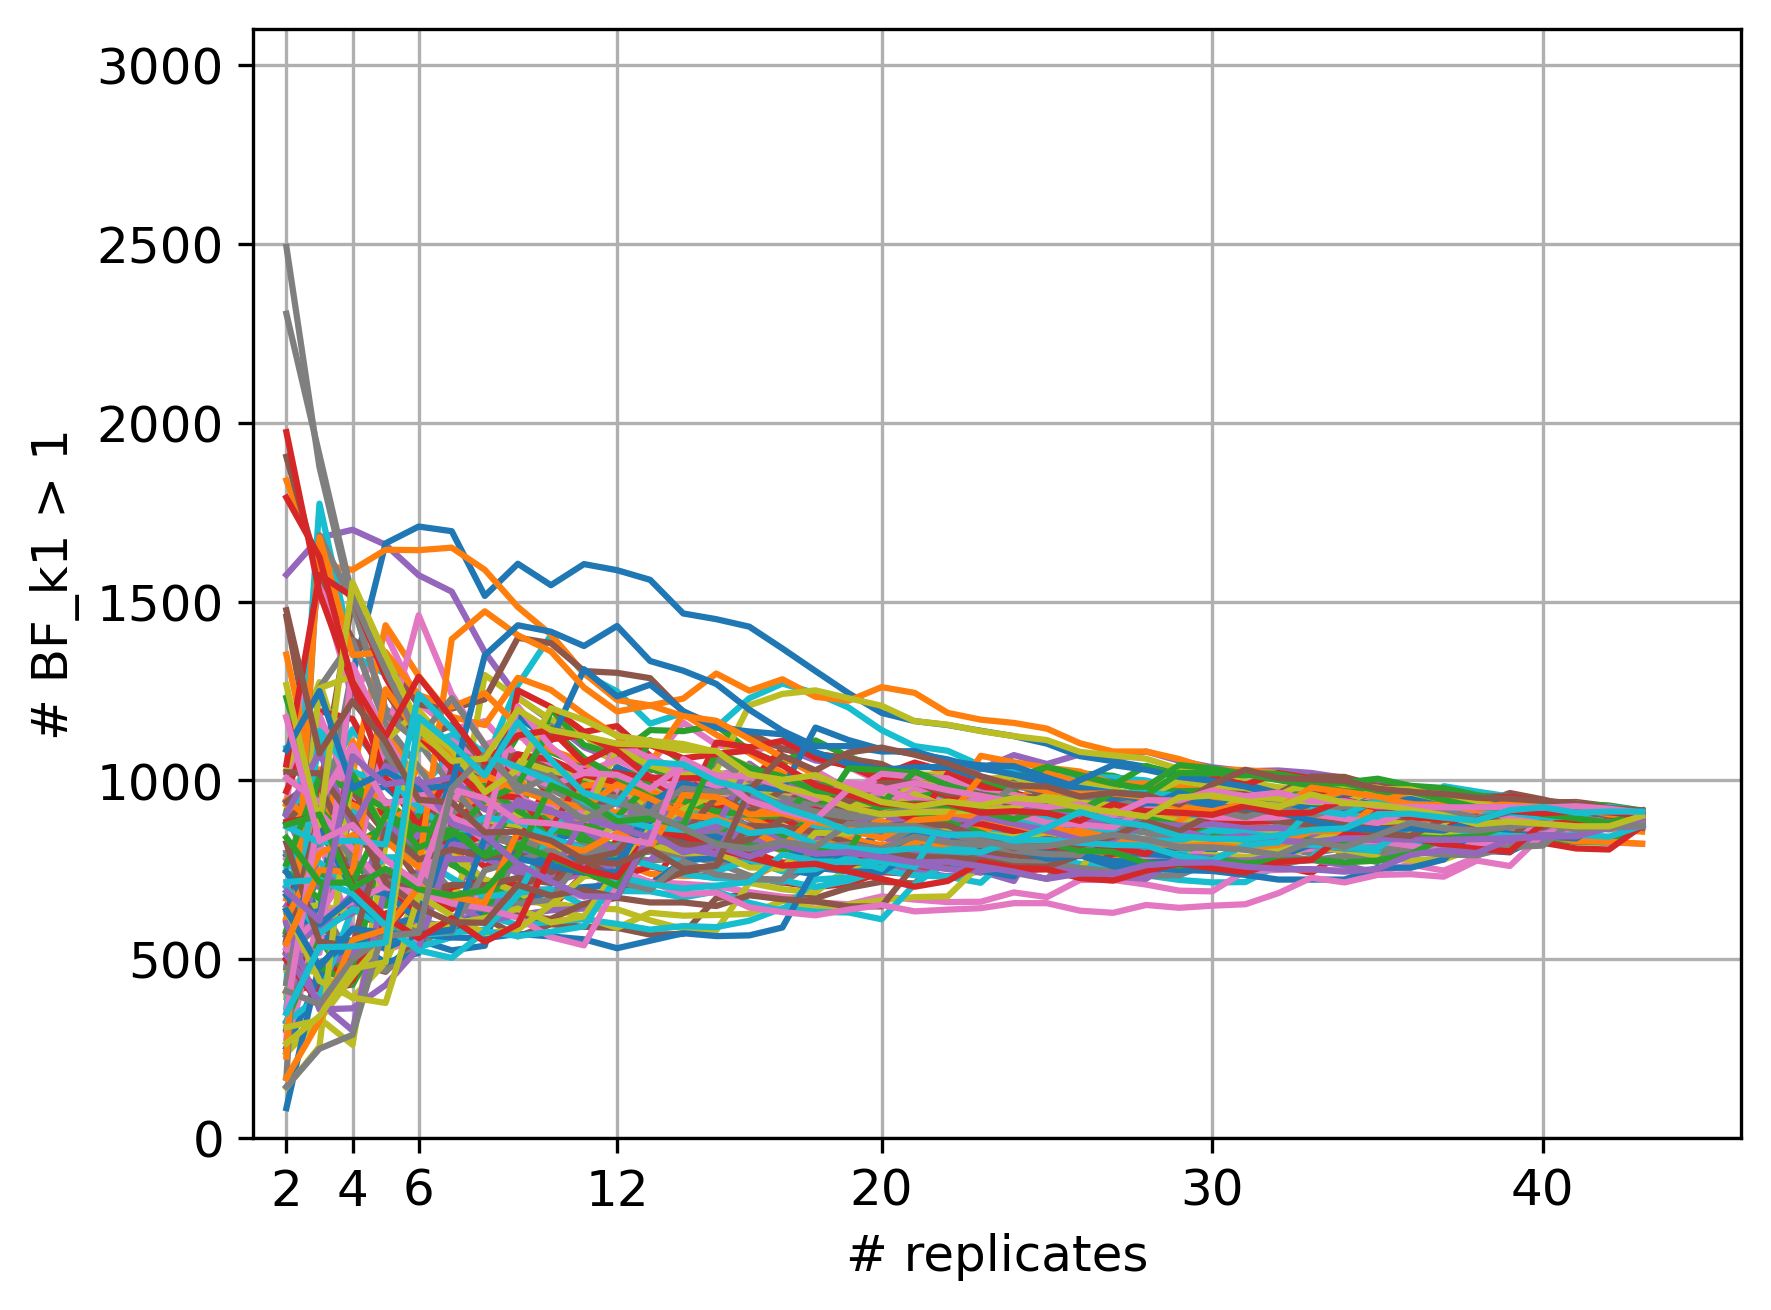

In [18]:
# Create the plot
ax = Snf2_cons_it.plot(legend=False, grid=True,
                      xlabel='# replicates',
                      ylabel='# BF_k1 > 1', fontsize=12)

# Set axis limits
ax.set_xlim(-1, 44)  # Set x-axis limits (adjust as needed)
ax.set_ylim(0, 3100)  # Set y-axis limits based on your data

# Set axis labels with increased font size
ax.set_xlabel('# replicates', fontsize=12)  # Adjust fontsize as needed
ax.set_ylabel('# BF_k1 > 1', fontsize=12)  # Adjust fontsize as needed

# Customize x-ticks and increase font size
ax.set_xticks([0, 2, 4, 10, 18, 28, 38])
ax.set_xticklabels(['2', '4', '6', '12', '20', '30', '40'], fontsize=12)  # Adjust fontsize as needed



# Show the plot
plt.show()

In [19]:
# Checking for intersections and unions in Snf2_CIG

# Convert each inner list to a set
sets = [set(lst) for lst in Snf2_CIG]

print('# genes with BF_k1 > 1 for all replicates throughout the iterations')
for lst in Snf2_CIG:
    print(len(lst))

# Find the intersection of all sets
Snf2_intersection = set.intersection(*sets)

# Print the Snf2_intersection
print('intersection: ', len(Snf2_intersection))

# Find the union of all sets
Snf2_union = set.union(*sets)

# Print the union
print('union: ', len(Snf2_union))


# genes with BF_k1 > 1 for all replicates throughout the iterations
902
899
872
910
913
914
823
905
872
868
905
900
906
901
912
873
901
906
873
907
911
912
907
914
912
907
884
879
916
915
912
901
874
899
872
910
911
884
906
911
914
857
916
910
895
910
895
898
905
910
903
823
896
873
915
916
872
913
912
912
910
916
900
884
900
868
903
913
897
894
879
897
898
910
879
901
879
911
913
874
905
897
873
906
872
895
910
910
899
914
916
902
912
902
894
916
910
874
901
913
intersection:  757
union:  922


In [20]:
# Checking for intersections and unions in WT_CIG

# Convert each inner list to a set
sets = [set(lst) for lst in WT_CIG]

print('# genes with BF_k1 > 1 for all replicates throughout the iterations')
for lst in WT_CIG:
    print(len(lst))

# Find the intersection of all sets
WT_intersection = set.intersection(*sets)

# Print the WT_intersection
print('intersection: ', len(WT_intersection))

# Find the union of all sets
WT_union = set.union(*sets)

# Print the union
print('union: ', len(WT_union))


# genes with BF_k1 > 1 for all replicates throughout the iterations
1617
1551
1606
1601
1615
1618
1614
1598
1559
1603
1548
1596
1559
1611
1598
1617
1617
1606
1505
1572
1608
1606
1602
1614
1559
1608
1597
1610
1505
1580
1617
1611
1603
1581
1613
1602
1598
1610
1580
1612
1613
1597
1614
1580
1611
1614
1618
1618
1598
1607
1596
1607
1606
1605
1611
1602
1580
1611
1617
1623
1580
1617
1548
1606
1617
1610
1603
1594
1551
1608
1581
1617
1607
1596
1608
1618
1604
1596
1611
1610
1548
1618
1598
1594
1608
1581
1580
1618
1615
1618
1611
1548
1617
1611
1551
1603
1597
1612
1617
1614
intersection:  1422
union:  1633


In [21]:
# importing bayexpress results to explore the CIGs

RALL_bayexpress = pd.read_csv('DGE_results/RALL_bayexpress.csv').iloc[:,1:].rename(columns={'genes': "locus_name"})

RALL_bayexpress

,locus_name,BF_21,FC
0,15S_rRNA,-3.710645,0.274047
1,21S_rRNA,-1.302642,0.147177
2,HRA1,-5.206545,-0.564787
3,ICR1,76.746125,0.504048
4,LSR1,0.451012,0.120243
...,...,...,...
7121,tY(GUA)J2,-7.312143,0.861839
7122,tY(GUA)M1,-7.406574,0.022303
7123,tY(GUA)M2,-7.727890,0.183767
7124,tY(GUA)O,-7.622253,0.347266


In [22]:
# let's see what those CIGs are

display(RALL_bayexpress.iloc[list(WT_union)]) 
display(RALL_bayexpress.iloc[list(Snf2_union)])

# hmm interesting

,locus_name,BF_21,FC
1,21S_rRNA,-1.302642,0.147177
4,LSR1,0.451012,0.120243
41,RDN5-1,13.774601,0.316040
46,RDN5-6,15.230943,0.469612
56,RUF5-1,-1.191579,0.080133
...,...,...,...
6731,YPR191W,218.989419,0.279871
6745,YPR204W,814.266672,0.541523
6752,snR17a,7.383833,0.329308
6761,snR30,20.556922,0.159709


,locus_name,BF_21,FC
0,15S_rRNA,-3.710645,0.274047
1,21S_rRNA,-1.302642,0.147177
4,LSR1,0.451012,0.120243
4100,YLL021W,891.706282,0.521375
4103,YLL024C,9077.546061,-0.490986
...,...,...,...
4063,YKR094C,158.639355,-0.086969
4064,YKR095W,1141.755429,0.533953
4068,YKR098C,843.035626,0.732050
4085,YLL008W,1202.946112,-0.845752


In [23]:
# let's see what CIGs have BF_21 > 1

# out of 1633
display(RALL_bayexpress.iloc[(list(WT_union))].loc[RALL_bayexpress.BF_21 > 1])

# out of 922
display(RALL_bayexpress.iloc[list(Snf2_union)].loc[RALL_bayexpress.BF_21 > 1])

# hmm interesting

,locus_name,BF_21,FC
41,RDN5-1,13.774601,0.316040
46,RDN5-6,15.230943,0.469612
58,SCR1,10.530223,0.125605
59,SRG1,365.733360,-0.939803
60,TLC1,777.763124,0.472738
...,...,...,...
6731,YPR191W,218.989419,0.279871
6745,YPR204W,814.266672,0.541523
6752,snR17a,7.383833,0.329308
6761,snR30,20.556922,0.159709


,locus_name,BF_21,FC
4100,YLL021W,891.706282,0.521375
4103,YLL024C,9077.546061,-0.490986
4105,YLL026W,6986.693811,-0.641283
4118,YLL039C,533.296466,0.257212
4120,YLL041C,3.231386,0.060734
...,...,...,...
4060,YKR091W,757.902699,-0.557891
4063,YKR094C,158.639355,-0.086969
4064,YKR095W,1141.755429,0.533953
4068,YKR098C,843.035626,0.732050


In [24]:
# calculating average <q> for each additional replicate for the plots


def get_avq(data):
    output = pd.DataFrame({'genes': data.genes})
    for k in range(2,len(data.columns)):

        N = sum(data.iloc[:,1:k].sum(axis=0, numeric_only=True))

        n_i = data.iloc[:,1:k].sum(axis=1, numeric_only=True)
        
        output[f'{k-1}'] = (n_i + 1) / (N+2)

    return output


# WT_yeast = get_BF_21(WT_yeast)

# display(WT_yeast)

# Snf2_yeast = get_BF_21(Snf2_yeast)

# display(Snf2_yeast)

WT_yeast_avq = get_avq(WT_yeast)

display(WT_yeast_avq)


Snf2_yeast_avq = get_avq(Snf2_yeast)

display(Snf2_yeast_avq)


WT_yeast_avq.to_csv('WT_yeast_avq.csv')
Snf2_yeast_avq.to_csv('Snf2_yeast_avq.csv')

,genes,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,15S_rRNA,5.030082e-07,1.082671e-06,2.266838e-06,1.757651e-06,1.936241e-06,1.611843e-06,1.414441e-06,1.262933e-06,1.211224e-06,...,1.904640e-06,1.853748e-06,1.946728e-06,1.911901e-06,1.879292e-06,1.874652e-06,1.864698e-06,1.802844e-06,1.838121e-06,1.808986e-06
1,21S_rRNA,3.521057e-06,7.001270e-06,9.757261e-06,9.667083e-06,1.097203e-05,9.352440e-06,8.599160e-06,7.869044e-06,7.712282e-06,...,1.143895e-05,1.116937e-05,1.165616e-05,1.143130e-05,1.125617e-05,1.124791e-05,1.114460e-05,1.082007e-05,1.111147e-05,1.103367e-05
2,HRA1,6.706775e-07,4.330683e-07,3.942327e-07,3.254910e-07,3.356151e-07,3.373626e-07,3.536103e-07,3.053245e-07,3.213451e-07,...,3.409082e-07,3.498319e-07,3.457776e-07,3.543033e-07,3.621552e-07,3.608785e-07,3.579971e-07,3.515545e-07,3.605317e-07,3.538079e-07
3,ICR1,1.274287e-05,1.436343e-05,1.507940e-05,1.507023e-05,1.448308e-05,1.510635e-05,1.486771e-05,1.450291e-05,1.438637e-05,...,1.402170e-05,1.395360e-05,1.399016e-05,1.398161e-05,1.403270e-05,1.409661e-05,1.399302e-05,1.393298e-05,1.398095e-05,1.403248e-05
4,LSR1,1.022783e-05,1.616788e-05,2.252055e-05,2.018044e-05,2.098885e-05,2.226593e-05,2.221316e-05,2.034571e-05,2.072676e-05,...,2.320770e-05,2.282563e-05,2.321551e-05,2.321690e-05,2.314857e-05,2.302277e-05,2.269390e-05,2.223207e-05,2.225545e-05,2.218147e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7121,tY(GUA)J2,1.676694e-07,1.443561e-07,9.855819e-08,6.509820e-08,5.163308e-08,7.496946e-08,6.429279e-08,5.551354e-08,4.943770e-08,...,1.852762e-08,1.803257e-08,1.728888e-08,1.671242e-08,1.631330e-08,1.596807e-08,1.556509e-08,1.502370e-08,1.477589e-08,1.426645e-08
7122,tY(GUA)M1,1.676694e-07,7.217804e-08,9.855819e-08,9.764730e-08,1.032662e-07,9.371182e-08,8.036599e-08,6.939192e-08,7.415655e-08,...,4.817182e-08,4.688468e-08,4.840887e-08,5.013727e-08,4.893989e-08,5.109783e-08,4.980829e-08,4.807583e-08,4.728285e-08,4.850592e-08
7123,tY(GUA)M2,1.676694e-07,7.217804e-08,9.855819e-08,6.509820e-08,5.163308e-08,3.748473e-08,4.821959e-08,4.163515e-08,3.707828e-08,...,1.482210e-08,1.442606e-08,1.383111e-08,1.336994e-08,1.305064e-08,1.277446e-08,1.245207e-08,1.201896e-08,1.182071e-08,1.141316e-08
7124,tY(GUA)O,1.676694e-07,7.217804e-08,4.927909e-08,3.254910e-08,2.581654e-08,1.874236e-08,3.214639e-08,2.775677e-08,2.471885e-08,...,1.111657e-08,1.081954e-08,1.037333e-08,1.336994e-08,1.305064e-08,1.277446e-08,1.245207e-08,1.201896e-08,1.182071e-08,1.141316e-08


,genes,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
0,15S_rRNA,4.888009e-07,3.699162e-07,4.332702e-07,4.431870e-07,1.392500e-06,1.178058e-06,1.093068e-06,9.750276e-07,1.354988e-06,...,2.247482e-06,2.162239e-06,2.153404e-06,2.107489e-06,2.068077e-06,2.252873e-06,2.219721e-06,2.264491e-06,2.219710e-06,2.184992e-06
1,21S_rRNA,3.128326e-06,2.642259e-06,2.635727e-06,3.050169e-06,1.045480e-05,8.800790e-06,8.213191e-06,7.299531e-06,8.343876e-06,...,1.195357e-05,1.158432e-05,1.153281e-05,1.139055e-05,1.119966e-05,1.252824e-05,1.236465e-05,1.273472e-05,1.249908e-05,1.232996e-05
2,HRA1,5.865611e-07,3.699162e-07,3.610585e-07,2.867680e-07,2.873412e-07,2.425414e-07,2.732670e-07,2.898731e-07,2.614890e-07,...,2.475201e-07,2.514231e-07,2.603689e-07,2.526609e-07,2.534122e-07,2.465408e-07,2.432571e-07,2.434937e-07,2.431111e-07,2.376114e-07
3,ICR1,2.013860e-05,2.124376e-05,2.213289e-05,2.255039e-05,2.192635e-05,2.195000e-05,2.166400e-05,2.130567e-05,2.095478e-05,...,1.977850e-05,1.973357e-05,1.970839e-05,1.967188e-05,1.975450e-05,1.979128e-05,1.981993e-05,1.979874e-05,1.982148e-05,1.987671e-05
4,LSR1,2.062740e-05,1.659338e-05,1.707807e-05,1.910918e-05,2.278837e-05,2.311074e-05,2.170954e-05,2.058099e-05,2.169170e-05,...,2.351111e-05,2.317493e-05,2.318508e-05,2.295350e-05,2.265855e-05,2.414683e-05,2.418197e-05,2.428173e-05,2.402572e-05,2.406074e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7121,tY(GUA)J2,1.955204e-07,1.056903e-07,7.221170e-08,5.213964e-08,4.420634e-08,3.464878e-08,4.554450e-08,3.952815e-08,3.565759e-08,...,1.320107e-08,1.571395e-08,1.837898e-08,1.783489e-08,1.747671e-08,1.700282e-08,1.658571e-08,1.623291e-08,2.114009e-08,2.324459e-08
7122,tY(GUA)M1,9.776019e-08,5.284517e-08,7.221170e-08,5.213964e-08,8.841268e-08,6.929756e-08,6.072600e-08,5.270420e-08,4.754345e-08,...,4.950401e-08,5.028463e-08,5.207378e-08,5.350466e-08,5.243012e-08,5.100845e-08,4.975714e-08,4.869873e-08,4.756521e-08,4.648918e-08
7123,tY(GUA)M2,9.776019e-08,5.284517e-08,3.610585e-08,2.606982e-08,2.210317e-08,1.732439e-08,1.518150e-08,1.317605e-08,1.188586e-08,...,1.650134e-08,1.571395e-08,1.531582e-08,1.486241e-08,1.456392e-08,1.416901e-08,1.382143e-08,1.352743e-08,1.321256e-08,1.291366e-08
7124,tY(GUA)O,9.776019e-08,1.056903e-07,7.221170e-08,5.213964e-08,4.420634e-08,3.464878e-08,3.036300e-08,2.635210e-08,3.565759e-08,...,1.980160e-08,1.885673e-08,2.144214e-08,2.080737e-08,2.038949e-08,1.983662e-08,1.935000e-08,1.893840e-08,1.849758e-08,1.807913e-08


In [25]:
RALL_bayexpress['BF_k1_WT'] = get_BF_k1(WT_yeast.iloc[:,1:])
RALL_bayexpress['CIG_WT'] = RALL_bayexpress.index.isin(WT_union)

RALL_bayexpress['BF_k1_Snf2'] = get_BF_k1(Snf2_yeast.iloc[:,1:])
RALL_bayexpress['CIG_Snf2'] = RALL_bayexpress.index.isin(Snf2_union)

display(RALL_bayexpress)
RALL_bayexpress.to_csv('RALL_bayexpress.csv')

,locus_name,BF_21,FC,BF_k1_WT,CIG_WT,BF_k1_Snf2,CIG_Snf2
0,15S_rRNA,-3.710645,0.274047,-107.138056,False,53.627445,True
1,21S_rRNA,-1.302642,0.147177,362.115507,True,1052.203968,True
2,HRA1,-5.206545,-0.564787,-240.338654,False,-258.581365,False
3,ICR1,76.746125,0.504048,-194.077441,False,-196.467262,False
4,LSR1,0.451012,0.120243,251.787125,True,478.066414,True
...,...,...,...,...,...,...,...
7121,tY(GUA)J2,-7.312143,0.861839,-270.299503,False,-281.214963,False
7122,tY(GUA)M1,-7.406574,0.022303,-262.736078,False,-275.253246,False
7123,tY(GUA)M2,-7.727890,0.183767,-271.177492,False,-284.863866,False
7124,tY(GUA)O,-7.622253,0.347266,-270.291196,False,-282.682788,False


# How many genes would be marked as not consistent?

In [26]:
display((RALL_bayexpress.BF_k1_WT > 1).describe())

display((RALL_bayexpress.BF_k1_Snf2 > 1).describe())

display(((RALL_bayexpress.BF_k1_WT > 1) & (RALL_bayexpress.BF_k1_Snf2 > 1)).describe())

display(((RALL_bayexpress.BF_k1_WT > 1) | (RALL_bayexpress.BF_k1_Snf2 > 1)).describe())



count      7126
unique        2
top       False
freq       5524
Name: BF_k1_WT, dtype: object

count      7126
unique        2
top       False
freq       6223
Name: BF_k1_Snf2, dtype: object

count      7126
unique        2
top       False
freq       6359
dtype: object

count      7126
unique        2
top       False
freq       5388
dtype: object

In [27]:
WT_yeast_q = pd.DataFrame({})

for col in WT_yeast.columns[1:43]:

    WT_yeast_q[col+'_q'] = (WT_yeast[col]+1) / (sum(WT_yeast[col])+2)

WT_yeast_q.to_csv('WT_yeast_q.csv')

WT_yeast_q

,13_q,8_q,38_q,27_q,5_q,16_q,14_q,33_q,6_q,19_q,...,15_q,1_q,30_q,40_q,21_q,4_q,24_q,31_q,39_q,17_q
0,1.651220e-06,4.065404e-07,1.603579e-06,5.808502e-07,2.745867e-06,5.386557e-06,1.353193e-06,1.349760e-07,8.207817e-07,2.573225e-06,...,5.250010e-07,5.030082e-07,3.455352e-06,4.120753e-06,2.093998e-06,8.628760e-07,1.042284e-06,1.816573e-07,1.727728e-07,3.619449e-06
1,4.513335e-06,3.353958e-06,7.277780e-06,4.065951e-06,1.610077e-05,3.986052e-05,7.910972e-06,1.484737e-06,5.129886e-06,9.649594e-06,...,2.756255e-06,3.521057e-06,1.307024e-05,2.866611e-05,1.439624e-05,9.587511e-06,5.732564e-06,2.724860e-06,1.900501e-06,1.670515e-05
2,3.302440e-07,1.016351e-07,3.700566e-07,9.293603e-07,4.992486e-07,1.795519e-07,5.204587e-07,8.098563e-07,4.103909e-07,4.288709e-07,...,1.312503e-07,6.706775e-07,4.506981e-07,1.074979e-06,6.543744e-07,2.876253e-07,2.084569e-07,4.541433e-07,2.591592e-07,9.744670e-07
3,1.398033e-05,1.229785e-05,1.011488e-05,1.556678e-05,1.235640e-05,1.274819e-05,1.634240e-05,1.160794e-05,1.682602e-05,1.275891e-05,...,1.509378e-05,1.274287e-05,1.442234e-05,1.702050e-05,1.518149e-05,1.514827e-05,1.396661e-05,1.017281e-05,1.235325e-05,1.809724e-05
4,2.201627e-05,8.638984e-06,1.011488e-05,3.090123e-05,2.421356e-05,5.655885e-05,1.374011e-05,9.043395e-06,2.571783e-05,1.254447e-05,...,1.312503e-05,1.022783e-05,3.365212e-05,2.382870e-05,2.970860e-05,1.572352e-05,2.105414e-05,9.173695e-06,9.502503e-06,2.881638e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7121,1.100813e-07,1.016351e-07,1.233522e-07,1.161700e-07,1.248121e-07,1.795519e-07,1.040917e-07,1.349760e-07,2.051954e-07,1.072177e-07,...,1.312503e-07,1.676694e-07,1.502327e-07,1.791632e-07,1.308749e-07,9.587511e-08,1.042284e-07,9.082867e-08,8.638639e-08,1.392096e-07
7122,1.100813e-07,1.016351e-07,1.233522e-07,2.323401e-07,2.496243e-07,1.795519e-07,1.040917e-07,1.349760e-07,1.367970e-07,1.072177e-07,...,1.312503e-07,1.676694e-07,1.502327e-07,1.791632e-07,2.617497e-07,1.917502e-07,2.084569e-07,9.082867e-08,8.638639e-08,4.176287e-07
7123,1.100813e-07,1.016351e-07,1.233522e-07,2.323401e-07,1.248121e-07,1.795519e-07,1.040917e-07,1.349760e-07,6.839848e-08,1.072177e-07,...,1.312503e-07,1.676694e-07,1.502327e-07,1.791632e-07,1.308749e-07,9.587511e-08,1.042284e-07,9.082867e-08,8.638639e-08,1.392096e-07
7124,1.100813e-07,1.016351e-07,1.233522e-07,1.161700e-07,1.248121e-07,1.795519e-07,1.040917e-07,1.349760e-07,6.839848e-08,1.072177e-07,...,1.312503e-07,1.676694e-07,1.502327e-07,1.791632e-07,1.308749e-07,9.587511e-08,1.042284e-07,9.082867e-08,8.638639e-08,1.392096e-07


In [28]:
Snf2_yeast_q = pd.DataFrame({})

for col in Snf2_yeast.columns[1:43]:

    Snf2_yeast_q[col+'_q'] = (Snf2_yeast[col]+1) / (sum(Snf2_yeast[col])+2)

Snf2_yeast_q.to_csv('Snf2_yeast_q.csv')

Snf2_yeast_q

,11_q,23_q,5_q,27_q,43_q,33_q,13_q,24_q,31_q,28_q,...,40_q,7_q,21_q,32_q,26_q,15_q,10_q,22_q,19_q,2_q
0,6.755117e-07,9.171568e-07,6.827575e-06,4.152554e-06,7.991772e-07,1.127455e-06,9.497976e-07,1.205007e-06,8.953913e-07,7.889508e-07,...,1.014152e-06,6.136811e-07,1.215388e-06,4.463240e-07,9.023679e-07,5.007454e-06,8.074703e-07,7.894240e-06,2.203145e-06,3.450619e-07
1,3.242456e-06,7.642973e-06,5.186051e-05,2.366956e-05,5.137568e-06,3.883457e-06,4.748988e-06,7.832543e-06,5.148500e-06,6.048623e-06,...,5.972229e-06,4.173032e-06,5.401724e-06,3.459011e-06,7.863492e-06,3.848866e-05,6.560696e-06,3.114636e-05,9.337138e-06,2.185392e-06
2,4.053070e-07,1.019063e-07,4.358026e-07,2.768369e-07,1.141682e-07,2.505456e-07,2.374494e-07,6.025033e-07,3.357717e-07,6.574590e-07,...,2.253671e-07,6.136811e-07,1.350431e-07,3.347430e-07,2.578194e-07,2.945561e-07,4.037352e-07,4.305949e-07,6.294700e-07,2.300412e-07
3,2.202168e-05,2.201176e-05,1.859425e-05,1.716389e-05,2.237696e-05,1.828983e-05,1.733381e-05,1.491196e-05,1.712436e-05,1.354366e-05,...,2.107183e-05,1.976053e-05,2.133681e-05,1.305498e-05,2.797341e-05,2.002981e-05,1.937929e-05,1.901794e-05,1.982830e-05,2.265906e-05
4,2.418332e-05,1.569357e-05,4.343500e-05,3.681931e-05,2.568784e-05,2.117111e-05,7.242207e-06,1.551446e-05,2.126554e-05,1.078233e-05,...,2.569185e-05,1.190541e-05,2.376759e-05,9.707547e-06,1.740281e-05,4.320156e-05,1.594754e-05,3.695939e-05,2.706721e-05,1.196214e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7121,1.351023e-07,1.019063e-07,1.452675e-07,1.384185e-07,2.283363e-07,1.252728e-07,1.187247e-07,1.506258e-07,1.119239e-07,1.314918e-07,...,1.126836e-07,2.454724e-07,1.350431e-07,1.115810e-07,2.578194e-07,9.818537e-08,1.009338e-07,7.176581e-08,1.049117e-07,1.150206e-07
7122,1.351023e-07,2.038126e-07,4.358026e-07,1.384185e-07,1.141682e-07,2.505456e-07,1.187247e-07,1.506258e-07,1.119239e-07,2.629836e-07,...,1.126836e-07,1.227362e-07,4.051293e-07,1.115810e-07,1.289097e-07,1.963707e-07,1.009338e-07,1.435316e-07,1.049117e-07,1.150206e-07
7123,2.702047e-07,1.019063e-07,1.452675e-07,1.384185e-07,1.141682e-07,1.252728e-07,1.187247e-07,1.506258e-07,1.119239e-07,1.314918e-07,...,1.126836e-07,1.227362e-07,1.350431e-07,1.115810e-07,1.289097e-07,1.963707e-07,1.009338e-07,7.176581e-08,2.098233e-07,1.150206e-07
7124,1.351023e-07,1.019063e-07,1.452675e-07,1.384185e-07,1.141682e-07,1.252728e-07,1.187247e-07,1.506258e-07,2.238478e-07,1.314918e-07,...,1.126836e-07,1.227362e-07,1.350431e-07,1.115810e-07,1.289097e-07,9.818537e-08,1.009338e-07,7.176581e-08,1.049117e-07,2.300412e-07


In [29]:
RALL_bayexpress

,locus_name,BF_21,FC,BF_k1_WT,CIG_WT,BF_k1_Snf2,CIG_Snf2
0,15S_rRNA,-3.710645,0.274047,-107.138056,False,53.627445,True
1,21S_rRNA,-1.302642,0.147177,362.115507,True,1052.203968,True
2,HRA1,-5.206545,-0.564787,-240.338654,False,-258.581365,False
3,ICR1,76.746125,0.504048,-194.077441,False,-196.467262,False
4,LSR1,0.451012,0.120243,251.787125,True,478.066414,True
...,...,...,...,...,...,...,...
7121,tY(GUA)J2,-7.312143,0.861839,-270.299503,False,-281.214963,False
7122,tY(GUA)M1,-7.406574,0.022303,-262.736078,False,-275.253246,False
7123,tY(GUA)M2,-7.727890,0.183767,-271.177492,False,-284.863866,False
7124,tY(GUA)O,-7.622253,0.347266,-270.291196,False,-282.682788,False


In [30]:
# WT union CIG, examples

display(WT_yeast.iloc[list(WT_union)][:5])
display(Snf2_yeast.iloc[list(WT_union)][:5])

print(list(WT_yeast.iloc[list(WT_union)][:5].genes))


,genes,13,8,38,27,5,16,14,33,6,...,15,1,30,40,21,4,24,31,39,17
1,21S_rRNA,20,76,101,99,128,74,36,32,57,...,10,274,49,30,72,58,21,159,107,70
4,LSR1,60,163,233,163,193,375,194,84,211,...,66,385,232,149,114,81,109,132,243,128
41,RDN5-1,50,42,105,48,36,80,37,50,49,...,28,184,40,48,27,107,63,17,201,29
46,RDN5-6,21,11,71,7,16,15,16,25,23,...,8,95,14,9,24,42,5,4,106,18
56,RUF5-1,159,404,313,454,457,732,297,155,247,...,138,380,326,197,554,102,318,198,351,350


,genes,11,23,5,27,43,33,13,24,31,...,21,32,26,15,10,22,19,2,4,30
1,21S_rRNA,31,18,23,44,356,35,33,13,148,...,64,79,67,13,576,52,234,23,44,24
4,LSR1,210,103,159,260,298,303,96,132,263,...,250,195,153,57,742,227,227,117,224,136
41,RDN5-1,49,40,48,79,175,77,33,34,134,...,96,103,72,36,326,50,53,43,55,58
46,RDN5-6,18,14,11,31,84,21,18,7,46,...,49,47,27,8,212,10,35,13,20,26
56,RUF5-1,472,217,267,409,291,619,301,292,196,...,499,271,366,225,376,491,385,373,541,375


['21S_rRNA', 'LSR1', 'RDN5-1', 'RDN5-6', 'RUF5-1']


In [31]:
# WT union CIGs, examples

# let's see what CIGs have BF_21 > 1

display(RALL_bayexpress.iloc[(list(WT_union))].loc[RALL_bayexpress.BF_21 > 1].sort_values(by='BF_21')[:5])

# hmm interesting

display(WT_yeast.iloc[RALL_bayexpress.iloc[(list(WT_union))].loc[RALL_bayexpress.BF_21 > 1].sort_values(by='BF_21')[:5].index])
display(Snf2_yeast.iloc[RALL_bayexpress.iloc[(list(WT_union))].loc[RALL_bayexpress.BF_21 > 1].sort_values(by='BF_21')[:5].index])

display(list(RALL_bayexpress.iloc[(list(WT_union))].loc[RALL_bayexpress.BF_21 > 1].sort_values(by='BF_21')[:5].locus_name))


,locus_name,BF_21,FC,BF_k1_WT,CIG_WT,BF_k1_Snf2,CIG_Snf2
3425,YJL098W,1.025525,-0.091190,113.153322,True,-129.167778,False
5742,YOL115W,1.025888,0.075491,57.474774,True,-151.068325,False
4515,YLR333C,1.447678,-0.029229,196.567132,True,97.113080,True
5822,YOR021C,1.559348,0.053039,92.677944,True,-118.214175,False
1540,YDR408C,2.105490,-0.049501,-6.324689,True,-62.712539,False


,genes,13,8,38,27,5,16,14,33,6,...,15,1,30,40,21,4,24,31,39,17
3425,YJL098W,191,444,189,274,482,835,377,351,333,...,425,319,600,276,190,276,740,141,675,209
5742,YOL115W,264,616,398,517,650,1168,568,430,505,...,422,490,739,394,326,292,794,277,827,350
4515,YLR333C,1998,3860,2924,4519,3708,6447,3511,3448,4006,...,3045,4715,4487,2930,2862,2345,4573,2453,5339,3408
5822,YOR021C,613,1116,776,1198,1241,2370,1216,1055,1132,...,931,1311,1572,964,616,765,1750,593,1737,959
1540,YDR408C,1267,1172,950,1814,1178,2045,1383,1651,1693,...,1096,2000,1386,1014,1127,1575,1944,888,1873,1428


,genes,11,23,5,27,43,33,13,24,31,...,21,32,26,15,10,22,19,2,4,30
3425,YJL098W,422,275,270,406,206,479,388,422,328,...,632,355,483,251,318,441,302,344,430,272
5742,YOL115W,631,462,529,677,386,884,442,632,568,...,996,523,574,420,580,568,518,596,664,599
4515,YLR333C,4120,3430,3463,4082,2873,4475,2786,4668,4097,...,5687,3221,3619,2557,4038,3758,3569,3820,3803,3577
5822,YOR021C,1312,1060,1072,1540,870,1717,1025,1434,1224,...,2116,1146,1205,805,1134,1341,1011,1206,1316,945
1540,YDR408C,1539,1440,1308,1575,1285,2026,1449,1278,1144,...,2456,1158,1872,1210,1756,1399,1320,1310,1314,1219


['YJL098W', 'YOL115W', 'YLR333C', 'YOR021C', 'YDR408C']

In [32]:
# WT union CIGs, examples

# let's see what CIGs have BF_21 > 1

display(RALL_bayexpress.iloc[(list(WT_union))].loc[RALL_bayexpress.BF_21 > 1].sort_values(by='BF_21')[-5:])

# hmm interesting

display(WT_yeast.iloc[RALL_bayexpress.iloc[(list(WT_union))].loc[RALL_bayexpress.BF_21 > 1].sort_values(by='BF_21')[-5:].index])
display(Snf2_yeast.iloc[RALL_bayexpress.iloc[(list(WT_union))].loc[RALL_bayexpress.BF_21 > 1].sort_values(by='BF_21')[-5:].index])

display(list(RALL_bayexpress.iloc[(list(WT_union))].loc[RALL_bayexpress.BF_21 > 1].sort_values(by='BF_21')[-5:].locus_name))


,locus_name,BF_21,FC,BF_k1_WT,CIG_WT,BF_k1_Snf2,CIG_Snf2
2639,YGR192C,101517.928512,-0.456369,52530.251796,True,23438.201797,True
6209,YOR383C,118338.158193,1.478789,1920.042323,True,10685.558763,True
1465,YDR342C,151255.899622,-2.643644,21822.485016,True,2076.867472,True
3012,YHR174W,205922.035360,-0.847059,13841.417356,True,7918.998188,True
1175,YDR077W,341558.582413,-3.175344,13017.391966,True,1422.483953,True


,genes,13,8,38,27,5,16,14,33,6,...,15,1,30,40,21,4,24,31,39,17
2639,YGR192C,188825,196804,172119,328674,225435,357247,261535,343455,268394,...,246621,358116,278531,209062,191739,318398,338511,169415,348635,244192
6209,YOR383C,12713,11599,10437,18694,10940,21254,11928,20445,14405,...,11286,21585,17444,12251,10503,16357,18733,8162,19044,14295
1465,YDR342C,20257,15357,26120,29846,13135,29153,16334,36916,24772,...,13346,47023,14585,25504,23590,25281,20870,22192,24641,22226
3012,YHR174W,129581,133346,109168,207147,145674,268592,196925,211933,189789,...,157763,235246,191877,136675,120124,195917,243868,107856,237778,158290
1175,YDR077W,35563,31153,31852,54048,30594,65771,39147,58449,45629,...,37196,63004,38304,36697,33838,54827,54371,26658,50782,45913


,genes,11,23,5,27,43,33,13,24,31,...,21,32,26,15,10,22,19,2,4,30
2639,YGR192C,205731,199983,210124,204494,158243,242692,209080,210681,178901,...,323457,180745,239701,163673,219417,167478,177709,170179,160083,142435
6209,YOR383C,36728,39745,40978,49945,33631,56767,31049,52374,33049,...,60183,37108,50351,34465,46750,37686,43105,47984,34235,29763
1465,YDR342C,6160,4351,3760,5849,2707,8347,4344,2973,2201,...,7219,4147,5938,2552,3313,4676,2446,2606,4178,1935
3012,YHR174W,107206,100381,112005,104187,76754,126571,101232,105342,114602,...,165739,86105,112391,81618,106975,86521,85779,95411,83560,75125
1175,YDR077W,5978,5813,4679,5852,4049,9193,4939,4684,2002,...,9285,5125,7021,4165,5594,5013,4016,3755,4674,3275


['YGR192C', 'YOR383C', 'YDR342C', 'YHR174W', 'YDR077W']

In [33]:
# Snf2 union CIGs, examples

display(WT_yeast.iloc[list(Snf2_union)][:5])
display(Snf2_yeast.iloc[list(Snf2_union)][:5])

print(list(Snf2_yeast.iloc[list(Snf2_union)][:5].genes))


,genes,13,8,38,27,5,16,14,33,6,...,15,1,30,40,21,4,24,31,39,17
0,15S_rRNA,2,12,31,8,21,11,2,3,7,...,0,49,9,4,11,12,1,22,12,4
1,21S_rRNA,20,76,101,99,128,74,36,32,57,...,10,274,49,30,72,58,21,159,107,70
4,LSR1,60,163,233,163,193,375,194,84,211,...,66,385,232,149,114,81,109,132,243,128
4100,YLL021W,750,1190,759,1284,1172,2758,1282,1194,1057,...,1067,1624,1648,1073,742,902,1868,606,1943,1076
4103,YLL024C,13940,16062,13989,24924,15680,28293,20802,24091,19080,...,17245,27935,22996,17317,16363,19475,24881,13493,25858,19777


,genes,11,23,5,27,43,33,13,24,31,...,21,32,26,15,10,22,19,2,4,30
0,15S_rRNA,4,2,5,5,46,5,4,2,40,...,7,15,6,1,85,8,34,3,6,3
1,21S_rRNA,31,18,23,44,356,35,33,13,148,...,64,79,67,13,576,52,234,23,44,24
4,LSR1,210,103,159,260,298,303,96,132,263,...,250,195,153,57,742,227,227,117,224,136
4100,YLL021W,1921,1652,1855,2319,1259,2869,1387,1922,1951,...,3413,1731,1890,1437,1780,1846,1514,1997,1825,1484
4103,YLL024C,14168,15026,15877,15309,11377,15925,11809,19464,17624,...,23070,12714,13424,11915,15851,12510,13526,16627,11588,12153


['15S_rRNA', '21S_rRNA', 'LSR1', 'YLL021W', 'YLL024C']


In [34]:
# exporting this table to compare with WT-WT control experiments

RALL_bayexpress.iloc[(list(WT_union))].to_csv('RALL_bayexpress_CIG_WT_union.csv')